In [ ]:
import cv2
image = cv2.imread(r"D:\something to do with studies\datas\face data\Humans\1 (1).jpeg")
 
y=200
x=200
h=300
w=400
crop_image = image[x:w, y:h]
cv2.imshow("Cropped", crop_image)
cv2.waitKey(0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#reading the image 

image = cv2.imread(r"D:\something to do with studies\datas\face data\Humans\1 (1).jpeg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the image
plt.imshow(image)

#saving image
cv2.imwrite('test_write.jpg',image)

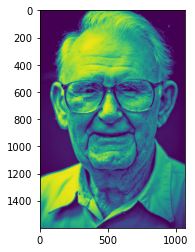

In [88]:
#converting image to Gray scale 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.imshow(gray_image) 

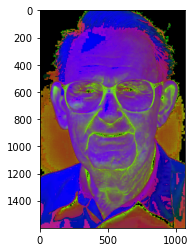

In [89]:
#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

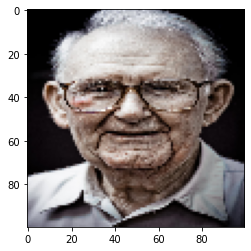

In [90]:
#converting image to size (100,100,3) 
smaller_image = cv2.resize(image,(100,100),interpolation=1) 
#plot the resized image
plt.imshow(smaller_image)

In [91]:
image.shape

(1600, 1066, 3)

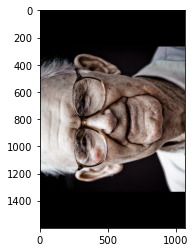

In [92]:
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

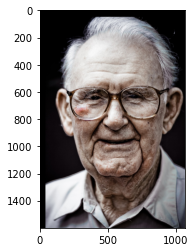

In [93]:
M = np.float32([[1,0,40],[0,1,50]]) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

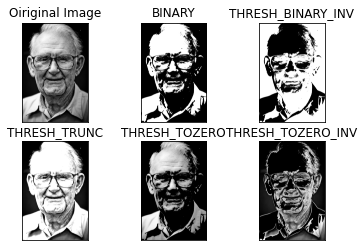

In [94]:
ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

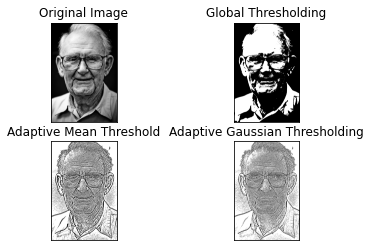

In [95]:


ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

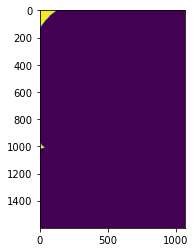

In [96]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#apply thresholding
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg)

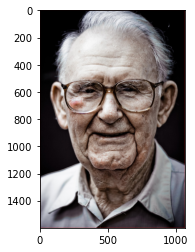

In [97]:
plt.imshow(image)

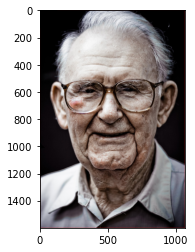

In [98]:
#apply thresholdin 
ret,mask = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
#plot the result
plt.imshow(final)

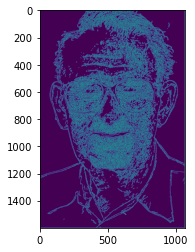

In [103]:
edges = cv2.Canny(image,100,50) 
#plot the edges
plt.imshow(edges)

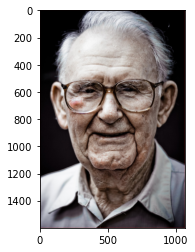

In [108]:
#using the averaging kernel for image smoothening 
averaging_kernel = np.ones((3,3),np.float32)/9 
filtered_image = cv2.filter2D(image,-1,kernel) 
#get a one dimensional Gaussian Kernel 
gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
#converting to two dimensional kernel using matrix multiplication 
gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
#you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 
plt.imshow(filtered_image )

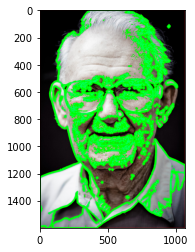

In [132]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
with_contours = cv2.drawContours(image,contours,-1,(0,255,0),3) 
plt.imshow(with_contours)

In [126]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#create sift object
sift  = cv2.xfeatures2d.SIFT_create()
#calculate keypoints and their orientation
keypoints,descriptors = sift.detectAndCompute(gray,None)
#plot keypoints on the image
with_keypoints = cv2.drawKeypoints(gray,keypoints)
#plot the image
plt.imshow(with_keypoints)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

(1600, 1066)


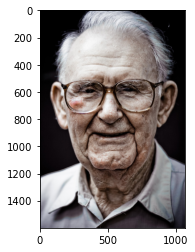

In [26]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#read the image and convert to grayscale format
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)
#calculate coordinates 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #draw bounding boxes around detected features
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#plot the image
plt.imshow(image)
#write image 


In [34]:
import numpy as np
import cv2
 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
img = cv2.imread(r"D:\something to do with studies\datas\face data\Humans\1 (1).jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.05, 3)
# When no faces detected, face_classifier returns and empty tuple
if faces == ():
    print("No Face Found")
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(100,0,0),2)
    cv2.imshow(r"D:\something to do with studies\datas\face data\Humans\1 (1).jpeg",img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        cv2.imshow('img',img)
        cv2.waitKey(0)
    
cv2.destroyAllWindows()

<ipython-input-34-6be09beb60c3>:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [15]:
face_cascade.load('anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')

False

In [39]:
import cv2 
import matplotlib.pyplot as plt
image = cv2.imread(r"D:\picz\Dataset\faces with puffy eyes\Image_37.jpg")

(960, 658)


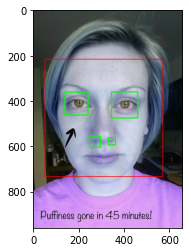

In [40]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#read the image and convert to grayscale format
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)
#calculate coordinates 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #draw bounding boxes around detected features
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)
#plot the image
plt.imshow(image)
#write image 

In [43]:
import cv2
# Read the input image
img = cv2.imread(r"D:\picz\Dataset\faces with puffy eyes\Image_37.jpg")

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the cascade
#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:  
	faces = img[y:y + h, x:x + w]
	cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
	roi_gray = gray[y:y+h, x:x+w]
	roi_color = img[y:y+h, x:x+w]        
	eyes = eye_cascade.detectMultiScale(roi_gray)
	eye_array=[]
	ctr=0
	for (ex,ey,ew,eh) in eyes:
		cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
		eye_array.append(roi_color[ey:ey+eh,ex:ex+ew])
		cv2.imshow(eye_array[ctr])
		ctr+=1
	#cv2_imshow(faces)
	#cv2.imwrite('face.jpg', faces)
	
# Display the output
cv2.imwrite('eye1.jpg', eye_array[0])
cv2.imwrite('eye2.jpg',eye_array[1])
cv2.imshow('img',img)
cv2.waitKey()

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [46]:
import cv2

# Read the input image
img = cv2.imread(r"D:\picz\Dataset\faces with puffy eyes\Image_37.jpg")

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
	cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
	faces = img[y:y + h, x:x + w]
	cv2.imshow("face",faces)
	cv2.imwrite('face.jpg', faces)
	
# Display the output
cv2.imwrite('detcted.jpg', img)
cv2.imshow('img', img)
cv2.waitKey()

-1

error: OpenCV(4.5.2) C:/Users/runneradmin/AppData/Local/Temp/pip-req-build-_8k9tw8n/opencv/modules/highgui/src/precomp.hpp:140: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'
